In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import missingno

In [77]:
df = pd.read_csv('Live_20210128.csv')
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [79]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [80]:
df.duplicated().sum()

0

In [81]:
df = df.drop(['Column1', 'Column2', 'Column3', 'Column4', 'status_id'], axis=1)

In [82]:
df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [83]:
df.isnull().sum()

status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [84]:
df['status_published'] = pd.to_datetime(df['status_published'])

In [85]:
df['time'] = df['status_published'].dt.strftime('%H:%M')

In [86]:
df['status_published'] = df['status_published'].dt.strftime('%Y/%m/%d')

In [87]:
df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,time
0,video,2018/04/22,529,512,262,432,92,3,1,1,0,06:00
1,photo,2018/04/21,150,0,0,150,0,0,0,0,0,22:45
2,video,2018/04/21,227,236,57,204,21,1,1,0,0,06:17
3,photo,2018/04/21,111,0,0,111,0,0,0,0,0,02:29
4,photo,2018/04/18,213,0,0,204,9,0,0,0,0,03:22


<Axes: >

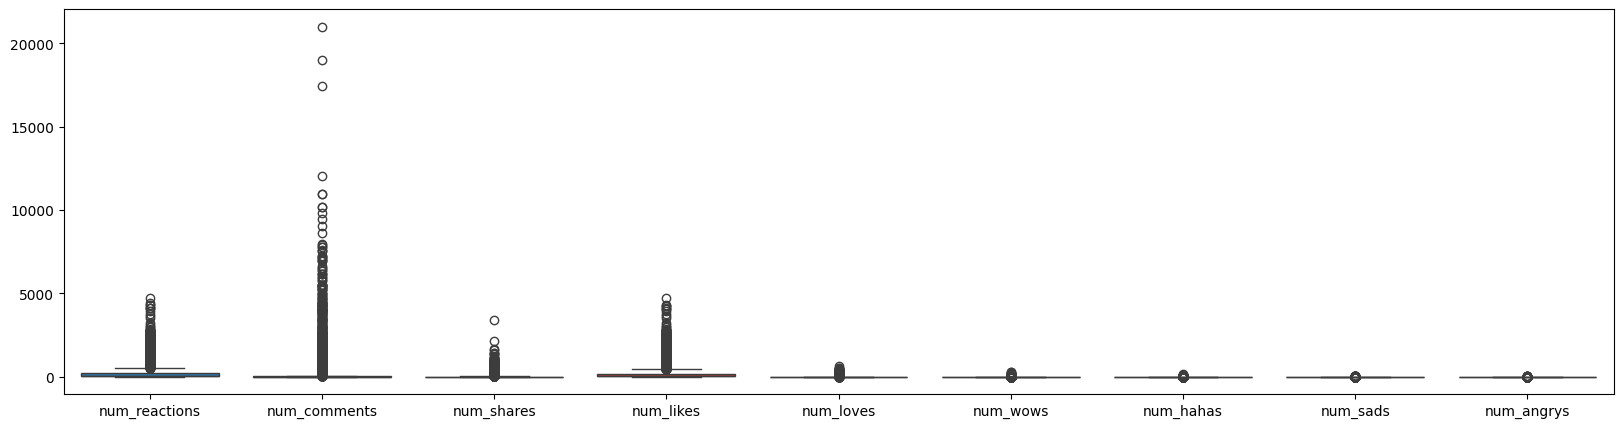

In [88]:
plt.figure(figsize=(20, 5))
sns.boxplot(df)

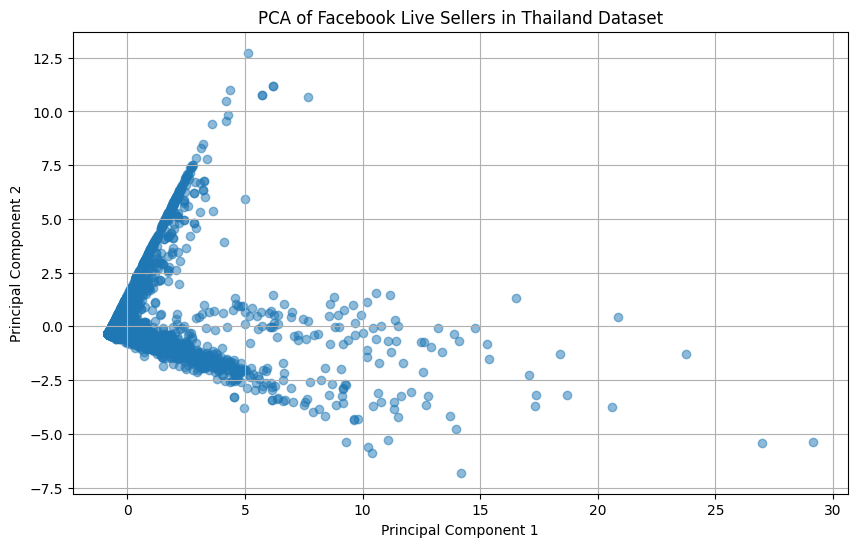

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 2. Pra-pemrosesan data
# Misalnya, kita hanya akan menggunakan kolom numerik untuk PCA
df_numeric = df.select_dtypes(include=['int', 'float'])
df_numeric.dropna(inplace=True)  # Menghapus baris dengan nilai yang hilang
X = df_numeric.values

# 3. Penskalaan fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Terapkan PCA
pca = PCA(n_components=2)  # Mengurangi dimensi menjadi 2
X_pca = pca.fit_transform(X_scaled)

# 5. Visualisasikan hasil PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('PCA of Facebook Live Sellers in Thailand Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


[Text(0.5, 0, 'Status Type'), Text(0, 0.5, 'Count')]

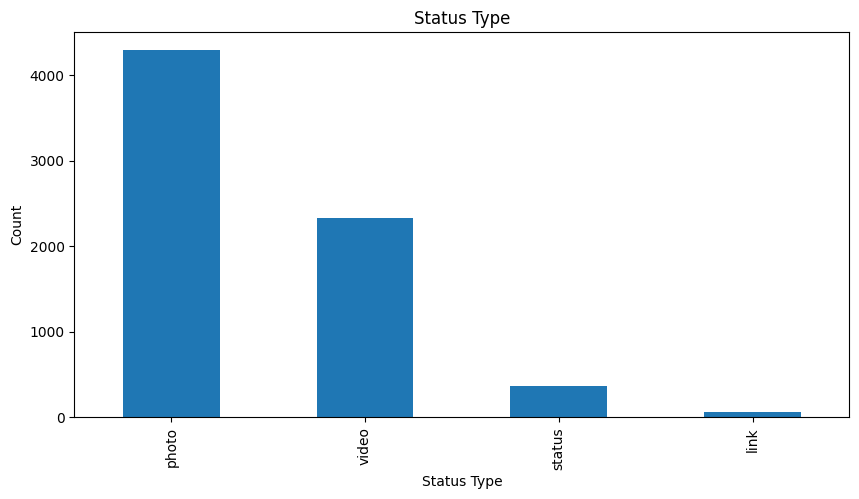

In [90]:
st_ax = df.status_type.value_counts().plot(kind='bar', figsize=(10,5), title="Status Type")
st_ax.set(xlabel="Status Type", ylabel="Count")

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_type       7050 non-null   object
 1   status_published  7050 non-null   object
 2   num_reactions     7050 non-null   int64 
 3   num_comments      7050 non-null   int64 
 4   num_shares        7050 non-null   int64 
 5   num_likes         7050 non-null   int64 
 6   num_loves         7050 non-null   int64 
 7   num_wows          7050 non-null   int64 
 8   num_hahas         7050 non-null   int64 
 9   num_sads          7050 non-null   int64 
 10  num_angrys        7050 non-null   int64 
 11  time              7050 non-null   object
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


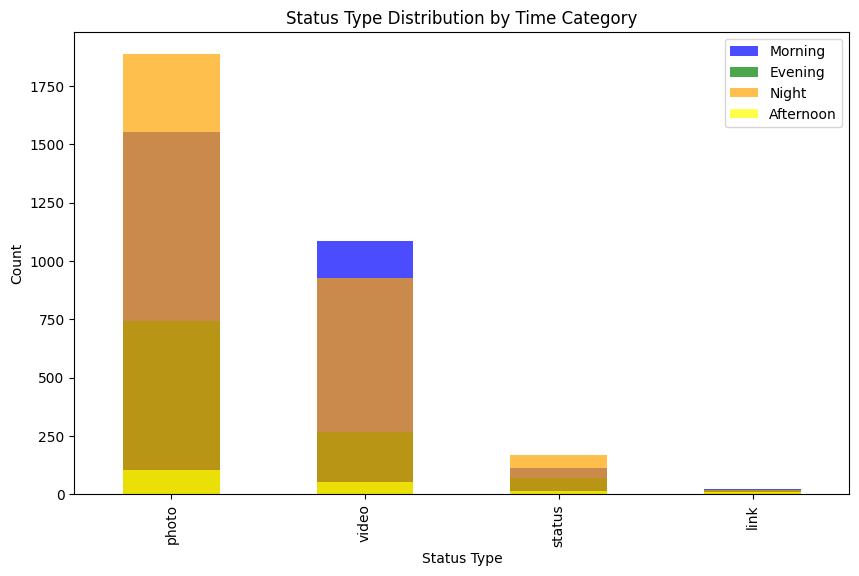

In [94]:
# 1. Mengubah kolom yang berisi nilai jam menjadi tipe data datetime
df['time'] = pd.to_datetime(df['time'], format='%H:%M')

# 2. Menentukan rentang waktu pagi, siang, sore, dan malam
morning_range = (6, 12)
afternoon_range = (12, 18)
evening_range = (18, 24)
night_range = (0, 6)

# 3. Membuat kolom baru yang menentukan kategori waktu untuk setiap entri
def categorize_time(hour):
    if morning_range[0] <= hour < morning_range[1]:
        return 'Morning'
    elif afternoon_range[0] <= hour < afternoon_range[1]:
        return 'Afternoon'
    elif evening_range[0] <= hour < evening_range[1]:
        return 'Evening'
    else:
        return 'Night'

df['time_category'] = df['time'].dt.hour.apply(categorize_time)

# 4. Memplot distribusi status_type untuk setiap kategori waktu
colors={'Morning': 'blue', 'Afternoon': 'yellow', 'Evening': 'green', 'Night': 'orange'}
plt.figure(figsize=(10, 6))
for category in df['time_category'].unique():
    df[df['time_category'] == category]['status_type'].value_counts().plot(kind='bar', label=category, alpha=0.7, color=colors[category])
plt.title('Status Type Distribution by Time Category')
plt.xlabel('Status Type')
plt.ylabel('Count')
plt.legend()
plt.show()
